Importing Necessary Libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Importing Train and test Data

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

Analysing the type of variables train set contains

Task 1 (EDA)

In [3]:
train.dtypes

City                      int64
Location_Score          float64
Internal_Audit_Score      int64
External_Audit_Score      int64
Fin_Score                 int64
Loss_score                int64
Past_Results              int64
IsUnderRisk               int64
dtype: object

In [4]:
train.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1


In [5]:
train.describe()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,19.576427,32.259346,8.189687,7.327808,7.046041,5.530387,0.613260,0.626151
std,14.722687,24.887291,3.312022,3.450667,3.156978,1.839124,0.764509,0.484270
min,0.000000,5.185000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000
25%,6.000000,13.565000,6.000000,5.000000,5.000000,4.000000,0.000000,0.000000
50%,14.000000,19.803000,8.000000,7.000000,7.000000,6.000000,1.000000,1.000000
75%,37.000000,62.594000,11.000000,10.000000,8.000000,7.000000,1.000000,1.000000
max,44.000000,80.809000,15.000000,15.000000,15.000000,13.000000,10.000000,1.000000


Analysing whether train set has null values or not

In [6]:
train.isnull().sum()

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
IsUnderRisk             0
dtype: int64

Analysing the test dataset

In [7]:
test.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
0,41,18.272,13,12,9,7,0
1,17,64.799,6,10,7,4,1
2,31,68.890,3,3,7,8,0
3,3,16.492,15,10,7,4,1
4,9,17.178,7,3,8,3,1


Looking for null values

In [8]:
test.isnull().sum()

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
dtype: int64

Checking the distribution of IsUnderRisk variable

<AxesSubplot:>

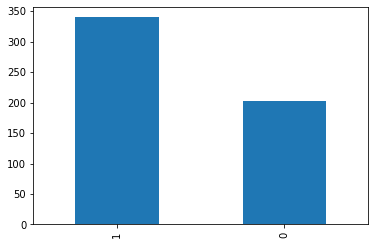

In [9]:
train.IsUnderRisk.value_counts().plot(kind='bar')

**Boxplot for Continous variables**

<AxesSubplot:>

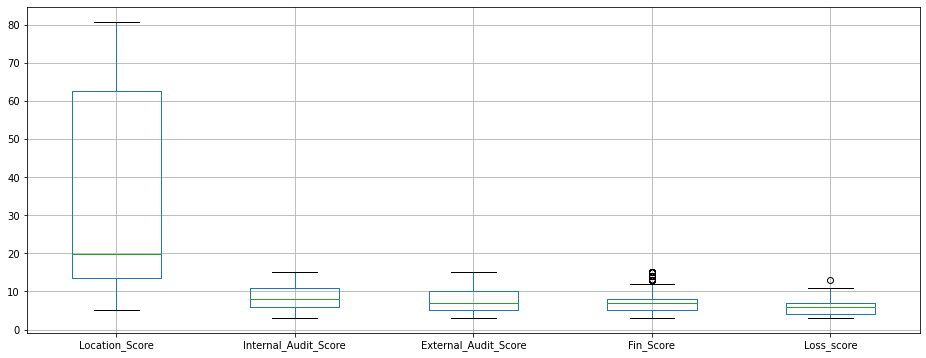

In [10]:
plt.figure(figsize=(16,6))
train.boxplot(column=['Location_Score', 'Internal_Audit_Score',
       'External_Audit_Score', 'Fin_Score', 'Loss_score'])

**Histogram on continous Varibales**

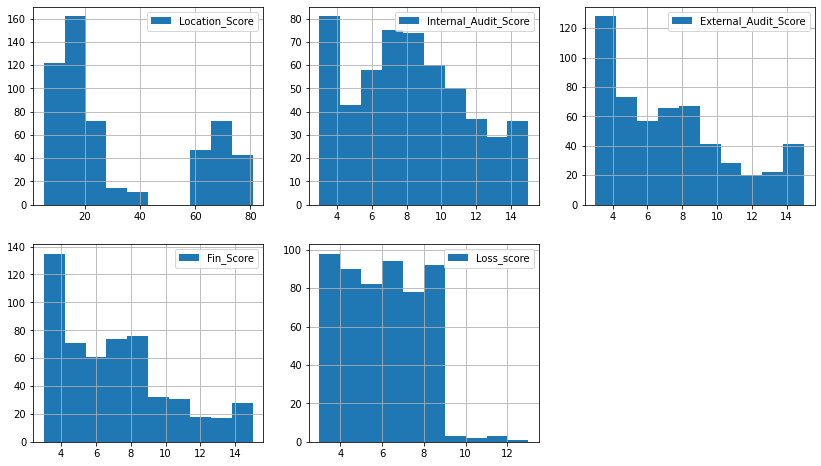

In [11]:
plt.figure(figsize=(14,8))

columns = ['Location_Score', 'Internal_Audit_Score', 'External_Audit_Score', 'Fin_Score', 'Loss_score']
for i,j in zip(range(1,6),columns):
    plt.subplot(2,3,i)
    train[j].hist(label=j)
    plt.legend()

**Density Plot On Continuose Variables

<Figure size 1008x576 with 0 Axes>

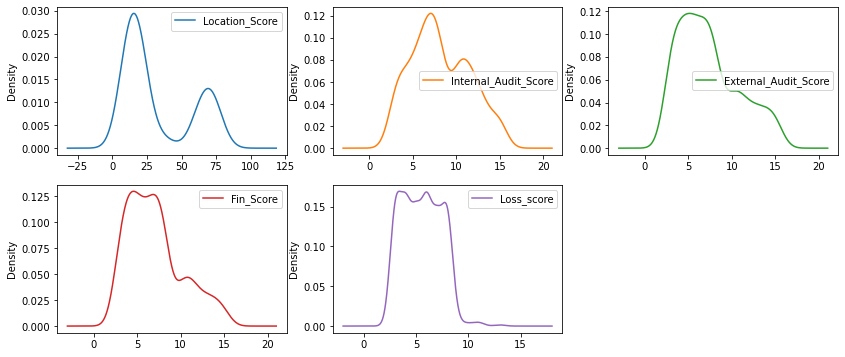

In [12]:
plt.figure(figsize=(14,8))
train[columns].plot(kind='density', subplots=True, layout=(2,3), sharex=False, sharey=False, figsize=(14,6))
plt.show()

In [13]:
plt.figure(figsize = (12,8))
datacor = train.drop(['IsUnderRisk'], axis = 1)
sns.barplot(datacor.columns,datacor.corrwith(train['IsUnderRisk']))

NameError: name 'sns' is not defined

<Figure size 864x576 with 0 Axes>

**Correlation Matrix Plot

In [ ]:
plt.figure(figsize=(20,8))
corr = train.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

**Modeling

In [ ]:
X = train.iloc[:, train.columns != 'IsUnderRisk']  # Removing the Target variable from the x variable
y = train.iloc[:, train.columns == 'IsUnderRisk']  # Taking only the target variable in y variable

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)  # Spliting in 80 20 ratio

In [ ]:
reg = LogisticRegression()
reg.fit(X_train,y_train)

In [ ]:
reg.predict(X_test)

In [ ]:
reg.score(X_test,y_test)

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.InputLayer(input_shape=(7, )),
                             tf.keras.layers.Dense(3, ),
                             tf.keras.layers.Dropout(0.05), 
                             tf.keras.layers.Dense(1, activation='sigmoid') 
])
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.006), loss='binary_crossentropy')
model.summary()

In [ ]:
model.fit(X_train,y_train, epochs=50)

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
model.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, reg.predict_proba(X_test)[:, 1])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
Y = np.array(y)
y_ = Y.reshape(-1,1)
y_

In [ ]:
encoder = OneHotEncoder(sparse=False)
y_new = encoder.fit_transform(y_)
y_new

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y_new,test_size=0.2)

In [ ]:
model2 = tf.keras.Sequential([
                             tf.keras.layers.InputLayer(input_shape=(7, )),
                             tf.keras.layers.Dense(3, ),
                             tf.keras.layers.Dense(2, activation='softmax')
])
model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.006), loss='categorical_crossentropy')
model2.summary()

In [ ]:
model2.fit(X_test,y_test, epochs=50)

In [ ]:
model2.evaluate(x_test,y_test)

In [ ]:
model2_predict = model2.predict(x_test)

In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test,model2_predict)